In [2]:
import os
import re
import sys
current_dir = os.path.dirname(os.path.abspath('./'))
if not current_dir in sys.path:
    sys.path.append(current_dir)
import mne as mne
import numpy as np
import mne
import pickle
import matplotlib.pyplot as plt


import os
import pickle
from dataclasses import dataclass
from typing import Dict, List

import mne
import numpy as np
from mne.decoding import CSP
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline

from combiners import EpochsCombiner
from utils.storage_management import check_path
from utils.data_management import dict2str
import re

In [5]:
arr1 = np.random.rand(352, 204, 1001)
arr2 = np.random.rand(472, 204, 1001)
arr3 = np.random.rand(480, 204, 1001)
arr4 = np.random.rand(480, 204, 1001)
np.concatenate([arr1, arr2, arr3, arr4], axis=0)

TypeError: concatenate() got multiple values for argument 'axis'

In [55]:
INCLUDED_SESSIONS = ['B1', 'B10']

content_root = '../'
subjects_folder_path = os.path.join(content_root, 'Source/Subjects')

for subject_name in os.listdir(subjects_folder_path):
    subject_path = os.path.join(subjects_folder_path, subject_name)

    subject_epochs = os.path.join(subject_path, 'Epochs')
    info_path  = os.path.join(subject_path, 'Info')
    for address, dirs, files in os.walk(info_path):
        if len(files) != 1:
            raise OSError(
                f'Several ({len(files)}) info files detected at {info_path}'
            )
        subject_info = pickle.load(
                open(
                    os.path.join(info_path, files[0]),
                    'rb'
                )
            )
        epochs = dict()
        for epoch in os.listdir(subject_epochs):
            session = re.findall(r'(_B\d\d?)', epoch)[0][1:]
            if session not in INCLUDED_SESSIONS:
                continue
            if not session in epochs:
                epochs.update({
                    session: {}
                })
            current_lock = None
            for lock in ['RespCor', 'StimCor']:
                if lock in epoch:
                    current_lock = lock
            if current_lock not in epochs[session]:
                epochs[session].update({current_lock: {}})
            for case in ['LI', 'LM', 'RI', 'RM']:
                if case in epoch:
                    epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})

print(dict2str(epochs))


Reading ../Source/Subjects/Az_Mar_05/Epochs/RespCor_RM_B1_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Az_Mar_05/Epochs/RespCor_RI_B1_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Az_Mar_05/Epochs/RespCor_LM_B1_epochs.fif ...


/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Az_Mar_05/Epochs/RespCor_RM_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})
/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Az_Mar_05/Epochs/RespCor_RI_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})
/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Az_Mar_05/Epochs/RespCor_LM_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_l

    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Az_Mar_05/Epochs/RespCor_LI_B1_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Fe_To_08/Epochs/LI_StimCor_B1_epochs.fif ...
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Fe_To_08/Epochs/LI_StimCor_B2_epochs.fif ...


/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Az_Mar_05/Epochs/RespCor_LI_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})
/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Fe_To_08/Epochs/LI_StimCor_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})
/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Fe_To_08/Epochs/LI_StimCor_B2_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_loc

    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Fe_To_08/Epochs/LM_StimCor_B1_epochs.fif ...
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Fe_To_08/Epochs/LM_StimCor_B2_epochs.fif ...
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Fe_To_08/Epochs/RI_StimCor_B1_epochs.fif ...


/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Fe_To_08/Epochs/LM_StimCor_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})
/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Fe_To_08/Epochs/LM_StimCor_B2_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})
/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Fe_To_08/Epochs/RI_StimCor_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock

    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Fe_To_08/Epochs/RI_StimCor_B2_epochs.fif ...
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Fe_To_08/Epochs/RM_StimCor_B1_epochs.fif ...
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Fe_To_08/Epochs/RM_StimCor_B2_epochs.fif ...


/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Fe_To_08/Epochs/RI_StimCor_B2_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})
/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Fe_To_08/Epochs/RM_StimCor_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})
/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Fe_To_08/Epochs/RM_StimCor_B2_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock

    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Fe_To_08/Epochs/RespCor_LI_B1_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Fe_To_08/Epochs/RespCor_LI_B2_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Fe_To_08/Epochs/RespCor_LM_B1_epochs.fif ...


/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Fe_To_08/Epochs/RespCor_LI_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})
/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Fe_To_08/Epochs/RespCor_LI_B2_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})
/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Fe_To_08/Epochs/RespCor_LM_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock

    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Fe_To_08/Epochs/RespCor_LM_B2_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Fe_To_08/Epochs/RespCor_RI_B1_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Fe_To_08/Epochs/RespCor_RI_B2_epochs.fif ...


/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Fe_To_08/Epochs/RespCor_LM_B2_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})
/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Fe_To_08/Epochs/RespCor_RI_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})
/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Fe_To_08/Epochs/RespCor_RI_B2_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock

    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Fe_To_08/Epochs/RespCor_RM_B1_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Fe_To_08/Epochs/RespCor_RM_B2_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Ga_Fed_06/Epochs/RI_StimCor_B1_epochs.fif ...


/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Fe_To_08/Epochs/RespCor_RM_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})
/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Fe_To_08/Epochs/RespCor_RM_B2_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})
/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/RI_StimCor_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_loc

    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Ga_Fed_06/Epochs/RI_StimCor_B2_epochs.fif ...
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Ga_Fed_06/Epochs/LM_StimCor_B2_epochs.fif ...
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/RI_StimCor_B2_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})
/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/LM_StimCor_B2_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})


Not setting metadata
Not setting metadata
58 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Ga_Fed_06/Epochs/LM_StimCor_B1_epochs.fif ...
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
58 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Ga_Fed_06/Epochs/RM_StimCor_B2_epochs.fif ...


/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/LM_StimCor_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})
/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/RM_StimCor_B2_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})


    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Ga_Fed_06/Epochs/RM_StimCor_B1_epochs.fif ...
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Ga_Fed_06/Epochs/LI_StimCor_B1_epochs.fif ...
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/RM_StimCor_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})
/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/LI_StimCor_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})


Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Ga_Fed_06/Epochs/LI_StimCor_B2_epochs.fif ...
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Ga_Fed_06/Epochs/RespCor_LI_B2_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Ga_Fed_06/Epochs/RespCor_LI_B1_epochs.fif ...


/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/LI_StimCor_B2_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})
/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/RespCor_LI_B2_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})
/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/RespCor_LI_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_l

    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Ga_Fed_06/Epochs/RespCor_LM_B1_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/RespCor_LM_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})


Not setting metadata
Not setting metadata
58 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Ga_Fed_06/Epochs/RespCor_LM_B2_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/RespCor_LM_B2_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})


Not setting metadata
Not setting metadata
58 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Ga_Fed_06/Epochs/RespCor_RI_B1_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/RespCor_RI_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})


Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Ga_Fed_06/Epochs/RespCor_RI_B2_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/RespCor_RI_B2_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})


Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Ga_Fed_06/Epochs/RespCor_RM_B1_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/RespCor_RM_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})


Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Ga_Fed_06/Epochs/RespCor_RM_B2_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_417285/3617874835.py:42: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/RespCor_RM_B2_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[session][current_lock].update({case: mne.read_epochs(os.path.join(subject_epochs, epoch))})


Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
  {
   B1: {
     StimCor: {
       RI: <EpochsFIF |  60 events (all good), -0.3 - 0.7 sec, baseline off, ~98.6 MB, data loaded,
 '0': 60>,
       LM: <EpochsFIF |  58 events (all good), -0.3 - 0.7 sec, baseline off, ~95.5 MB, data loaded,
 '0': 58>,
       RM: <EpochsFIF |  60 events (all good), -0.3 - 0.7 sec, baseline off, ~98.6 MB, data loaded,
 '0': 60>,
       LI: <EpochsFIF |  30 events (all good), -0.3 - 0.7 sec, baseline off, ~51.8 MB, data loaded,
 '0': 30>,
      }
     RespCor: {
       LI: <EpochsFIF |  30 events (all good), -0.5 - 0.5 sec, baseline off, ~51.8 MB, data loaded,
 '0': 30>,
       LM: <EpochsFIF |  58 events (all good), -0.5 - 0.5 sec, baseline off, ~95.5 MB, data loaded,
 '0': 58>,
       RI: <EpochsFIF |  60 events (all good), -0.5 - 0.5 sec, baseline off, ~98.6 MB, data loaded,
 '0': 60>,
       RM: <EpochsFIF |  60 events (all goo

In [ ]:
subject_path = os.path.join(subjects_folder_path, 'Az_Mar_05')
raw_path = os.path.join(subject_path, 'Raw', 'ML_Subject05_P1_tsss_mc_trans.fif')
resp_lock_lm_B1_epochs_path = os.path.join(subject_path, 'Epochs_old', 'resp_lock_lm_B1_epochs.fif')
resp_lock_rm_B1_epochs_path = os.path.join(subject_path, 'Epochs_old', 'resp_lock_rm_B1_epochs.fif')
resp_lock_li_B1_epochs_path = os.path.join(subject_path, 'Epochs_old', 'resp_lock_li_B1_epochs.fif')
resp_lock_ri_B1_epochs_path = os.path.join(subject_path, 'Epochs_old', 'resp_lock_ri_B1_epochs.fif')

resp_lock_lm_B1_epochs = mne.read_epochs(resp_lock_lm_B1_epochs_path)
resp_lock_rm_B1_epochs = mne.read_epochs(resp_lock_rm_B1_epochs_path)
resp_lock_li_B1_epochs = mne.read_epochs(resp_lock_li_B1_epochs_path)
resp_lock_ri_B1_epochs = mne.read_epochs(resp_lock_ri_B1_epochs_path)

In [5]:
content_root = '../'
subjects_folder_path = os.path.join(content_root, 'Source/Subjects')
subject_path = os.path.join(subjects_folder_path, 'Az_Mar_05')
raw_folder_path = os.path.join(subject_path, 'Raw')
raw_file_path = os.path.join(raw_folder_path, 'ML_Subject05_P1_tsss_mc_trans.fif')
resp_lock_path = os.path.join(subject_path, 'RespLock')
resp_lock_lm_path = os.path.join(resp_lock_path, 'LM')
resp_lock_rm_path = os.path.join(resp_lock_path, 'RM')
resp_lock_li_path = os.path.join(resp_lock_path, 'LI')
resp_lock_ri_path = os.path.join(resp_lock_path, 'RI')
resp_cor_lm_B1_path = os.path.join(resp_lock_lm_path, 'RespCor_LM_B1')
resp_cor_rm_B1_path = os.path.join(resp_lock_rm_path, 'RespCor_RM_B1')
resp_cor_li_B1_path = os.path.join(resp_lock_li_path, 'RespCor_LI_B1')
resp_cor_ri_B1_path = os.path.join(resp_lock_ri_path, 'RespCor_RI_B1')
resp_lock_lm_B1_dat_ft_path = os.path.join(resp_cor_lm_B1_path, 'dat_ft.mat')
resp_lock_rm_B1_dat_ft_path = os.path.join(resp_cor_rm_B1_path, 'dat_ft.mat')
resp_lock_li_B1_dat_ft_path = os.path.join(resp_cor_li_B1_path, 'dat_ft.mat')
resp_lock_ri_B1_dat_ft_path = os.path.join(resp_cor_ri_B1_path, 'dat_ft.mat')
original_data = mne.io.read_raw_fif(raw_file_path)
original_info = original_data.info
resp_lock_lm_B1_epochs = mne.read_epochs_fieldtrip(resp_lock_lm_B1_dat_ft_path, info=original_info)
resp_lock_rm_B1_epochs = mne.read_epochs_fieldtrip(resp_lock_rm_B1_dat_ft_path, info=original_info)
resp_lock_li_B1_epochs = mne.read_epochs_fieldtrip(resp_lock_li_B1_dat_ft_path, info=original_info)
resp_lock_ri_B1_epochs = mne.read_epochs_fieldtrip(resp_lock_ri_B1_dat_ft_path, info=original_info)

Opening raw data file ../Source/Subjects/Az_Mar_05/Raw/ML_Subject05_P1_tsss_mc_trans.fif...
    Range : 25000 ... 1114999 =     25.000 ...  1114.999 secs
Ready.


/tmp/ipykernel_364998/3205572953.py:19: RuntimeWarning: This filename (../Source/Subjects/Az_Mar_05/Raw/ML_Subject05_P1_tsss_mc_trans.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  original_data = mne.io.read_raw_fif(raw_file_path)


TypeError: only size-1 arrays can be converted to Python scalars

In [9]:
data = resp_lock_lm_B1_epochs[-1].get_data()



30 30


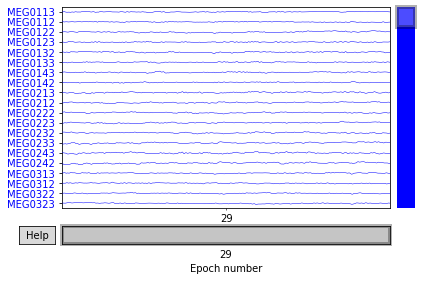

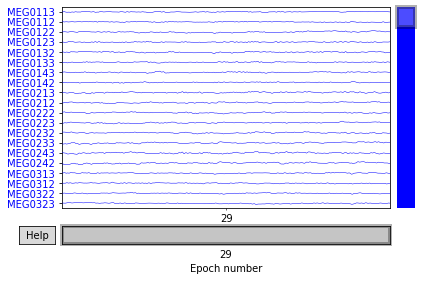

In [16]:
resp_lock_lm_B1_epochs[-1].plot(n_epochs=1)

In [ ]:
resp_lock_lm_B1_epochs.events

In [4]:
(resp_lock_lm_B1_epochs.info['events'][0]['list']).shape

(17724,)

Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


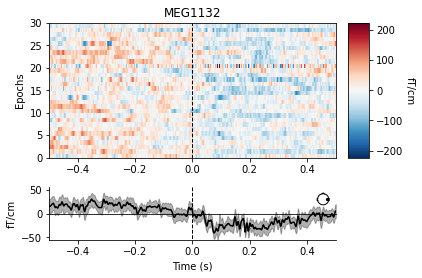

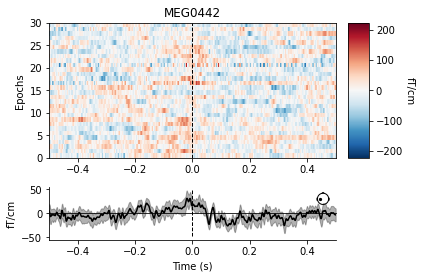

[<Figure size 432x288 with 4 Axes>, <Figure size 432x288 with 4 Axes>]

In [5]:
resp_lock_lm_B1_epochs.plot_image(picks=['MEG1132','MEG0442'])

In [6]:
resp_lock_lm_B1_epochs.get_data(picks=['MEG1132']).shape

(30, 1, 1001)

In [11]:
# epochs = resp_lock_rm_B1_epochs + resp_lock_lm_B1_epochs
print(resp_lock_lm_B1_epochs.events)
print(resp_lock_rm_B1_epochs.events)

[[ 0  0  0]
 [ 1  0  0]
 [ 2  0  0]
 [ 3  0  0]
 [ 4  0  0]
 [ 5  0  0]
 [ 6  0  0]
 [ 7  0  0]
 [ 8  0  0]
 [ 9  0  0]
 [10  0  0]
 [11  0  0]
 [12  0  0]
 [13  0  0]
 [14  0  0]
 [15  0  0]
 [16  0  0]
 [17  0  0]
 [18  0  0]
 [19  0  0]
 [20  0  0]
 [21  0  0]
 [22  0  0]
 [23  0  0]
 [24  0  0]
 [25  0  0]
 [26  0  0]
 [27  0  0]
 [28  0  0]
 [29  0  0]]
[[ 0  0  0]
 [ 1  0  0]
 [ 2  0  0]
 [ 3  0  0]
 [ 4  0  0]
 [ 5  0  0]
 [ 6  0  0]
 [ 7  0  0]
 [ 8  0  0]
 [ 9  0  0]
 [10  0  0]
 [11  0  0]
 [12  0  0]
 [13  0  0]
 [14  0  0]
 [15  0  0]
 [16  0  0]
 [17  0  0]
 [18  0  0]
 [19  0  0]
 [20  0  0]
 [21  0  0]
 [22  0  0]
 [23  0  0]
 [24  0  0]
 [25  0  0]
 [26  0  0]
 [27  0  0]
 [28  0  0]
 [29  0  0]]


In [2]:
resp_lock_rm_B1_epochs.save(os.path.join(subject_path, 'Epochs', 'resp_lock_rm_B1_epochs.fif'))
resp_lock_lm_B1_epochs.save(os.path.join(subject_path, 'Epochs', 'resp_lock_lm_B1_epochs.fif'))
resp_lock_ri_B1_epochs.save(os.path.join(subject_path, 'Epochs', 'resp_lock_ri_B1_epochs.fif'))
resp_lock_li_B1_epochs.save(os.path.join(subject_path, 'Epochs', 'resp_lock_li_B1_epochs.fif'))


/tmp/ipykernel_129499/2139980030.py:1: RuntimeWarning: This filename (../Source/Subjects/Az_Mar_05/Epochs/resp_lock_ri_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  resp_lock_ri_B1_epochs.save(os.path.join(subject_path, 'Epochs', 'resp_lock_ri_B1_epochs.fif'))
/tmp/ipykernel_129499/2139980030.py:2: RuntimeWarning: This filename (../Source/Subjects/Az_Mar_05/Epochs/resp_lock_li_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  resp_lock_li_B1_epochs.save(os.path.join(subject_path, 'Epochs', 'resp_lock_li_B1_epochs.fif'))


In [11]:
content_root = '../'
subjects_folder_path = os.path.join(content_root, 'Source/Subjects')

subjects_dirs = [
    os.path.join(subjects_folder_path, address)
    for address in os.listdir(subjects_folder_path)
]

n_trials = 10
sessions = [
    f'B{i}'
    for i in range(n_trials)
]

for subject_path in [
    os.path.join(subjects_folder_path, address)
    for address in os.listdir(subjects_folder_path)
]:
    for address, _, files in os.walk(os.path.join(subject_path, 'Raw')):
        info_path = os.path.join(subject_path, 'Info')
        check_path(info_path)
        if os.path.exists(
                os.path.join(info_path, f'{files[0][:-4]}_info.pkl')
        ):
            subject_info = pickle.load(
                open(
                    os.path.join(info_path, f'{files[0][:-4]}_info.pkl'),
                    'rb'
                )
            )
        else:
            subject_info = mne.io.read_raw_fif(os.path.join(address, files[0])).info
            pickle.dump(subject_info, open(os.path.join(info_path, f'{files[0][:-4]}_info.pkl'), 'wb'))
            print(f'Raw info saved at {os.path.join(info_path, f"{files[0][:-4]}_info.pkl")}')
            print(f'{files[0]} can be removed')

    for lock in ['StimLock', 'RespLock']:
        subject_lock = os.path.join(subject_path, lock)
        for case in os.listdir(subject_lock):
            subject_lock_case = os.path.join(subject_lock, case)
            for subject_lock_session in os.listdir(subject_lock_case):
                # print(subject_lock_session)
                subject_epochs = os.path.join(subject_path, 'Epochs')
                check_path(subject_epochs)
                if not os.path.exists(os.path.join(
                        subject_epochs, f'{subject_lock_session}_epochs.fif'
                    )):
                    dat_mat_path = os.path.join(subject_lock_case, subject_lock_session, 'dat_ft.mat')
                    try:
                        epochs = mne.read_epochs_fieldtrip(dat_mat_path, info=subject_info)
                    except ValueError as err:
                        print(f'Epochs for {subject_lock_session} can not be read due to {type(err)}\n{err}\n')
                        continue
                    epochs.save(
                        os.path.join(
                            subject_epochs, f'{subject_lock_session}_epochs.fif'
                        )
                    )

/home/user/PycharmProjects/FingerMovementDecoder/venv/lib/python3.9/site-packages/mne/io/fieldtrip/fieldtrip.py:123: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(ft_struct['trial'])  # create the epochs data array


Epochs for RI_StimCor_B2 can not be read due to <class 'ValueError'>
could not broadcast input array from shape (204,501) into shape (204,)

Epochs for RM_StimCor_B2 can not be read due to <class 'ValueError'>
could not broadcast input array from shape (204,501) into shape (204,)

Epochs for RespCor_LI_B2 can not be read due to <class 'ValueError'>
could not broadcast input array from shape (204,501) into shape (204,)

Epochs for RespCor_LI_B3 can not be read due to <class 'ValueError'>
could not broadcast input array from shape (204,1001) into shape (204,)

Epochs for RespCor_RI_B2 can not be read due to <class 'ValueError'>
could not broadcast input array from shape (204,501) into shape (204,)

Epochs for RespCor_RI_B3 can not be read due to <class 'ValueError'>
could not broadcast input array from shape (204,1001) into shape (204,)

Epochs for RespCor_LM_B2 can not be read due to <class 'ValueError'>
could not broadcast input array from shape (204,501) into shape (204,)

Epochs for 

In [3]:
EXCLUDED_SESSIONS = ['B10']
EXCLUDED_SUBJECTS = ['Az_Mar_05', 'Ga_Fed_06']
EXCLUDED_LOCKS = ['StimCor']

content_root = '../'
subjects_folder_path = os.path.join(content_root, 'Source/Subjects')

for subject_name in os.listdir(subjects_folder_path):
    if subject_name in EXCLUDED_SUBJECTS:
        print(f'Skip subject {subject_name}')
        continue
    subject_path = os.path.join(subjects_folder_path, subject_name)

    subject_epochs = os.path.join(subject_path, 'Epochs')
    info_path = os.path.join(subject_path, 'Info')
    for address, dirs, files in os.walk(info_path):
        if len(files) != 1:
            raise OSError(
                f'Several ({len(files)}) info files detected at {info_path}'
            )
        subject_info = pickle.load(
            open(
                os.path.join(info_path, files[0]),
                'rb'
            )
        )
        epochs = dict()
        for epoch in os.listdir(subject_epochs):
            session = re.findall(r'(_B\d\d?)', epoch)[0][1:]
            if session in EXCLUDED_SESSIONS:
                continue
            if not session in epochs:
                epochs.update({
                    session: {}
                })
            current_lock = None
            for lock in ['RespCor', 'StimCor']:
                if lock in epoch:
                    current_lock = lock
            if current_lock in EXCLUDED_LOCKS:
                continue
            if current_lock not in epochs[session] and current_lock is not None:
                epochs[session].update({current_lock: {}})
            elif current_lock is None:
                raise ValueError('This case is not RespCor nor StimCor')
            for case in ['LI', 'LM', 'RI', 'RM']:
                if case in epoch:
                    if case not in epochs[session][current_lock]:
                        epochs[session][current_lock].update(
                            {case: mne.read_epochs(os.path.join(subject_epochs, epoch))})
                    else:
                        print(f'\nThe case \"{case}\" already in epoch {epoch}, skipping via the conflict\n')

Skip subject Ga_Fed_06
Reading ../Source/Subjects/Fe_To_08/Epochs/RespCor_LI_B10_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Fe_To_08/Epochs/RespCor_LM_B10_epochs.fif ...


/tmp/ipykernel_1245405/3548622120.py:50: RuntimeWarning: This filename (../Source/Subjects/Fe_To_08/Epochs/RespCor_LI_B10_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  {case: mne.read_epochs(os.path.join(subject_epochs, epoch))})
/tmp/ipykernel_1245405/3548622120.py:50: RuntimeWarning: This filename (../Source/Subjects/Fe_To_08/Epochs/RespCor_LM_B10_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  {case: mne.read_epochs(os.path.join(subject_epochs, epoch))})


    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Fe_To_08/Epochs/RespCor_RI_B10_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Fe_To_08/Epochs/RespCor_RM_B10_epochs.fif ...


/tmp/ipykernel_1245405/3548622120.py:50: RuntimeWarning: This filename (../Source/Subjects/Fe_To_08/Epochs/RespCor_RI_B10_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  {case: mne.read_epochs(os.path.join(subject_epochs, epoch))})
/tmp/ipykernel_1245405/3548622120.py:50: RuntimeWarning: This filename (../Source/Subjects/Fe_To_08/Epochs/RespCor_RM_B10_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  {case: mne.read_epochs(os.path.join(subject_epochs, epoch))})


    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Skip subject Az_Mar_05


In [7]:
print(dict2str(epochs))

  {
   B10: {
     RespCor: {
       LI: <EpochsFIF |  30 events (all good), -0.5 - 0.5 sec, baseline off, ~51.8 MB, data loaded,
 '0': 30>,
       LM: <EpochsFIF |  30 events (all good), -0.5 - 0.5 sec, baseline off, ~51.8 MB, data loaded,
 '0': 30>,
       RI: <EpochsFIF |  30 events (all good), -0.5 - 0.5 sec, baseline off, ~51.8 MB, data loaded,
 '0': 30>,
       RM: <EpochsFIF |  30 events (all good), -0.5 - 0.5 sec, baseline off, ~51.8 MB, data loaded,
 '0': 30>,
      }
    }
  }

